# Load data

Index(['sub', 'PR Evidence', 'bias_highbaserate', 'pre_map_change',
       'post_map_change', 'two_step_planning', 'query_counts_PR',
       'query_counts_BR', 'bias_highbaserate_centered', 'PR', 'PR_adjusted'],
      dtype='object')
choices consistent with PR:
0.5723905723905723

[3.  1.5 4.  4.5 6.  0.  2. ]
[3.0, 1, 4.0, 5, 6.0, 0.0, 2.0]
[0.5        0.25       0.66666667 0.75       1.         0.
 0.33333333]


/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_93745/1694411348.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(x="PR", palette='Blues',data=df,ax=axes[0],order = [0,0.25,0.33,0.50,0.67,0.75,1.0])
/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_93745/1694411348.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[0].get_xticklabels()])


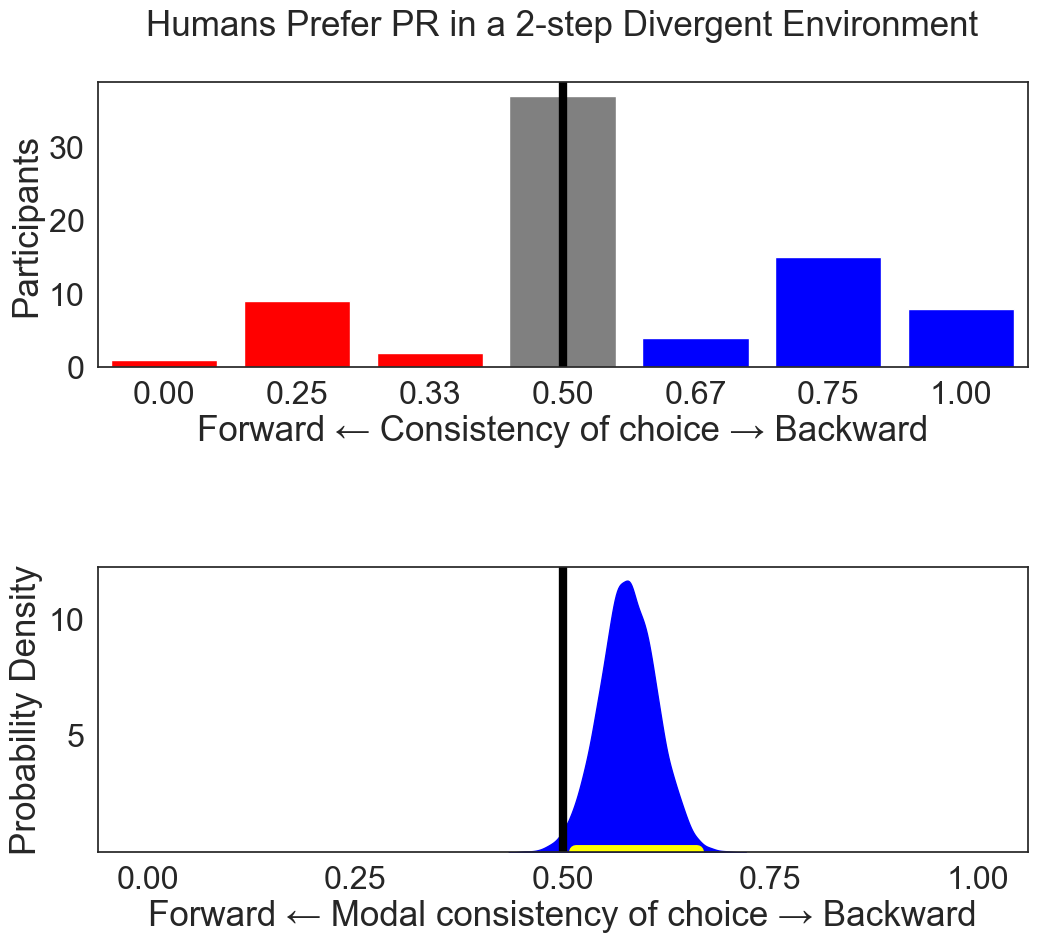

/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_93745/1694411348.py:113: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])
/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_93745/1694411348.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])


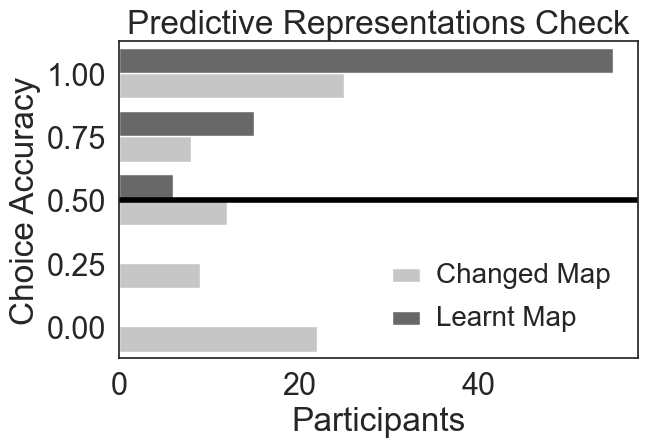

In [7]:
#load dependencies
import numpy as np
from IPython.display import Image
from matplotlib import gridspec
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import math


sns.set(style='white', palette='Set2', font='arial', font_scale=1.0, rc=None)

df=pd.read_csv('all_planning_questions_baseratebias2.csv') #load data
# df=df[df['query_counts_BR']>0]


query_counts_PR=df['query_counts_PR']
query_counts_BR=df['query_counts_BR']

#print means of each key variable

rr_map=round(df['pre_map_change']*4,2)
rr_map = rr_map.astype(int)

twostepplan=round(df['two_step_planning']*4,2)
twostepplan = twostepplan.astype(int)


tr_changed_map=round(df['post_map_change']*4,2)
tr_changed_map = tr_changed_map.astype(int)

df['bias_highbaserate_centered']=df['bias_highbaserate']-0.5

br_bias=round(df['bias_highbaserate']*df['query_counts_BR'],2)
br_bias = br_bias.astype(int)
df['PR']=df['PR Evidence']
df['PR_adjusted'] = [0.75 if x > 0.5 and x < 0.75 else (0.25 if x < 0.5 and x > 0 else x) for x in df['PR'].values]
print(df.columns)
PR_evidence=round(df['PR Evidence']*df['query_counts_PR'],2)
PR_evidence = PR_evidence.astype(int)

print('choices consistent with PR:')
print(np.sum(PR_evidence)/np.sum(df['query_counts_PR'].values))
print('')
n_subjects = len(df)

subjects= [*range(n_subjects)]
print(df["PR"].unique()*6)
list_adjusted=[1 if x > 1.1 and x < 1.99 else (5 if x < 5.1 and x > 4.1 else round(x,1)) for x in df['PR'].unique()*6]
print(list_adjusted)
print(df['PR'].unique())
# rr_map=df['pre_map_change']*4
# tr_changed_map=df['post_map_change']*4
sns.set(style='white', font='arial', font_scale=2.1, rc={'figure.figsize':(12,10)})


fig, axes = plt.subplots(2, 1)

x=sns.countplot(x="PR", palette='Blues',data=df,ax=axes[0],order = [0,0.25,0.33,0.50,0.67,0.75,1.0])

y=sns.kdeplot(data=df_posterior, x=('posterior', 'omega'),ax=axes[1],fill=True,alpha=1,color='blue')
axes[0].set_ylabel('Participants')

axes[0].bar(list_adjusted, df["PR"].value_counts(sort=False), color=['gray','red','blue','blue','blue','red','red'])
axes[0].set_xlabel('Forward \u2190 Consistency of choice \u2192 Backward')
axes[0].set_xlim(-0.5, 6.5)
# axes[0].xaxis.set_major_formatter('{x:.1f}')
axes[0].set_title('Humans Prefer PR in a 2-step Divergent Environment\n')

axes[0].axvline(3,color='black',linewidth=6.0)
axes[1].set_ylim
axes[1].set_ylabel('Probability Density')
axes[1].set_xlabel('Forward \u2190 Modal consistency of choice \u2192 Backward')
axes[1].axvline(0.5,color='black',linewidth=6.0)
axes[1].axhline(y=0,xmin=0.514,xmax=0.644,color='yellow',linewidth=10.0)
axes[1].set_xlim(-0.06,1.06)

plt.sca(axes[1])
plt.yticks([5,10])
plt.xticks([0,0.25,0.5,0.75,1.00])
axes[0].margins(x=0)
axes[1].margins(x=0)
axes[0].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[0].get_xticklabels()])

axes[1].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[1].get_xticklabels()])

fig.subplots_adjust(hspace=0.7)

plt.savefig('study5_PRevidence.png',dpi=300)

plt.show()

sns.set(style='white', font='arial', font_scale=2, rc={'figure.figsize':(7,5)})
fig, ax = plt.subplots()
#sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sns.set(style='white', font='arial', font_scale=2, rc={'figure.figsize':(7,5)})

#load data
df_new=pd.DataFrame()
df_new['Revaluation Score']=df['pre_map_change'].values.tolist()+df['post_map_change'].values.tolist()
df_new['']=['Learnt Map']*len(df)+['Changed Map']*len(df)                              
#plot transition revaluation performance

ax=sns.countplot(data=df_new, y="Revaluation Score",hue="",palette='Greys',orient='v')
plt.xlabel('Participants')

ax.set_ylim(-0.5,4.5)
ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])

ax.set_ylim(-0.5,4.5)
ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])

plt.axhline(2,color='black',linewidth=4.0)
sns.move_legend(ax, "lower right",frameon=False)

# Change the font size of the legend text
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_fontsize(20)

# Change the size and spacing of the legend bars
for patch in leg.get_patches():
    patch.set_height(10)
    patch.set_width(20)
    patch.set_x(patch.get_x() + 30) # adjust the y position of the bars


# for tick in ax.get_xaxis().get_major_ticks():
#     tick.set_pad(8.)

plt.ylabel('Choice Accuracy')
plt.title('Predictive Representations Check')

plt.tight_layout()

plt.savefig('study5_post_map_change.png',dpi=300)
plt.show()
# Print 0.1*SD of PR Evidence to define the ROPE



# Fit Model for Hypothesis 1: Evidence for PR-based Planning

Below we fit the beta-binomial described in text to choice data for Variable 1, which defines the number of times participants chose in line with PR-based planning. If omega, the mode of the group distribution, is estimated to be significantly greater than 0.5 (no evidence of PR-based planning), then we conclude evidence for our main hypothesis.

We followed Kruschke’s (2014) guidelines to derive the ROPE, wherein we took the standard deviation of the percentage of times subjects chose in line with PR-based planning and multiplied this value by 0.1 , which was 0.18, and multiplied this by 0.1, to define effects that are too small to be considered significant. We then rounded this up to 0.2 to make it even a bit more conservative than Kruschke’s (2014) recommendation. We use this ROPE for all subsequent analyses.

Note below, we fit the same model to the two subsequent manipulation checks, except include different variables (specifically, variables 3 and 5 as described in the preregistration).

In [2]:
# 4. Hierarchical regression using Bambi
import bambi as bmb
import arviz as az
model2 = bmb.Model("PR ~ bias_highbaserate_centered", df)
fitted2 = model2.fit(draws=10000,target_accept=0.9999)
# Print the summary DataFrame


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [PR_sigma, Intercept, bias_highbaserate_centered]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 15 seconds.


In [3]:
summary_df = az.summary(fitted2,var_names=['Intercept','bias_highbaserate_centered'], hdi_prob=0.95)  # Exclude random effects conditioned on sub_id, consider 95% HDI
print(summary_df)

                             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  \
Intercept                   0.558  0.027     0.505      0.611      0.000   
bias_highbaserate_centered  0.192  0.167    -0.140      0.516      0.001   

                            mcse_sd  ess_bulk  ess_tail  r_hat  
Intercept                     0.000   26957.0   22526.0    1.0  
bias_highbaserate_centered    0.001   28485.0   22314.0    1.0  


In [4]:
n_subjects = n_subjects
subjects= [*range(n_subjects)]
with pm.Model() as hierarchical_model:

    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)


    y = pm.Binomial('y',n=query_counts_PR,p=theta[subjects], observed=PR_evidence) 
    
with hierarchical_model:
    trace_main = pm.sample(draws=2000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.


In [5]:
import arviz as az
az.summary(trace_main,['omega'],hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,0.579,0.034,0.512,0.646,0.001,0.001,1682.0,2683.0,1.0


In [6]:
df_posterior=trace_main.to_dataframe()
df_posterior.to_csv('posterior_model.csv')


In [5]:
from scipy.stats import spearmanr as corrp
r,p=corrp(df['PR Evidence'],df['bias_highbaserate'])
print(r)

0.12396197219287726


In [39]:
n_subjects = n_subjects
subjects= [*range(n_subjects)]
with pm.Model() as hierarchical_model:

    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)


    y = pm.Binomial('y',n=query_counts_BR,p=theta[subjects], observed=br_bias) 
    
with hierarchical_model:
    trace = pm.sample(draws=2000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.


In [40]:
az.summary(trace,var_names=['omega'],hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,0.565,0.031,0.506,0.628,0.001,0.001,1295.0,2654.0,1.0


In [41]:
df_posterior_distal=trace.to_dataframe()

# Evidence of two step planning

In [42]:
n_subjects = n_subjects
subjects= [*range(n_subjects)]
with pm.Model() as hierarchical_model:

    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)


    y = pm.Binomial('y',n=4,p=theta[subjects], observed=twostepplan) 
    
with hierarchical_model:
    trace_twostep = pm.sample(draws=4000, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 18 seconds.


In [43]:
az.summary(trace_twostep,var_names=['omega'],hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,0.766,0.045,0.681,0.856,0.001,0.001,1614.0,2615.0,1.0


## Plot posterior for omega: The highest-density interval (black line) in the posterior does not include 0.3 or 0.7. 

Manipulation check passed!

/Users/pbs44/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pbs44/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pbs44/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pbs44/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

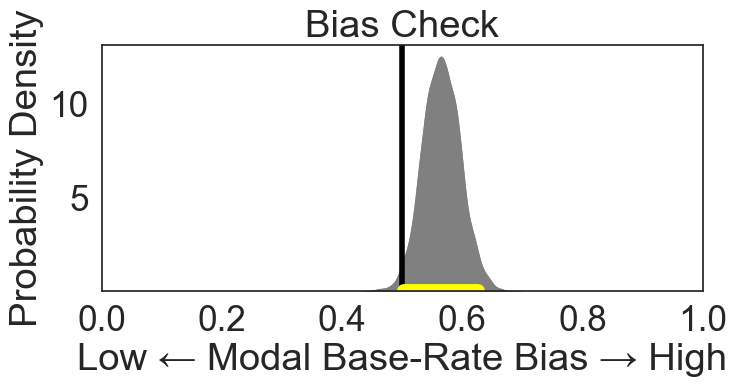

In [44]:
sns.set(style='white', font='arial', font_scale=2.3, rc={'figure.figsize':(8,4.5)})
fig, ax = plt.subplots()

x=sns.kdeplot(data=df_posterior_distal, x=('posterior', 'omega'),fill=True,alpha=1,color="gray")

y=sns.kdeplot(data=df_posterior_distal, x=('posterior', 'omega'),fill=True,alpha=1,color="gray")
ax.set_ylabel('Probability Density')
ax.set_xlabel('Low \u2190 Modal Base-Rate Bias \u2192 High')
ax.set_xlim(0,1.0)
ax.set_yticks([5,10])

ax.axvline(0.5,color='black',linewidth=4.0)

ax.set_title('Bias Check')
ax.axhline(y=0,xmin=0.503,xmax=0.626,color='yellow',linewidth=10.0)



ax.set_xticklabels(['{:.1f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])

plt.tight_layout()

plt.savefig('study5_action_distal_bias.png',dpi=300)
plt.show()

# Post-Map Change Performance

In [45]:
subjects= [*range(n_subjects)]

with pm.Model() as hierarchical_model:
    alpha = pm.Gamma('alpha', 1.105125 , 0.1051249)
    beta = pm.Gamma('beta', 1.105125 , 0.1051249)
    
    theta = pm.Beta('theta', alpha=alpha+1, beta=beta+1, shape=n_subjects)

    y = pm.Binomial('y',n=4,p=theta[subjects], observed=tr_changed_map) 
    
with hierarchical_model:
    trace_changed_map = pm.sample(draws=4000, target_accept=0.999,init='adapt_diag')


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 21 seconds.


In [46]:
import arviz as az
mean_tr=trace_changed_map.posterior.alpha.values/(trace_changed_map.posterior.alpha.values+trace_changed_map.posterior.beta.values)
az.summary(mean_tr,hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.564,0.237,0.13,0.99,0.002,0.002,9122.0,9154.0,1.0


In [30]:
import arviz as az
# diff_tr=diff_reval.posterior.alpha.values/(diff_reval.posterior.alpha.values+diff_reval.posterior.beta.values)
az.summary(diff_reval,['omega'],hdi_prob=0.95)

NameError: name 'diff_reval' is not defined

In [ ]:
print(trace_main.posterior.omega.values.flatten())

In [ ]:
successes=0 #number of times posterior did not include key value from ROPE
num_iterations=100
sample_size=75
for i in range(num_iterations): # fit model 300 times
    sample_omega=np.random.choice(trace_main.posterior.omega.values.flatten(), size=1)[0]
    sample_kappa=np.random.choice(trace_main.posterior.kappa.values.flatten(),size=1)[0]
    sample_alpha=sample_omega*(sample_kappa-2)+1
    sample_beta=(1-sample_omega)*(sample_kappa-2)+1

    thetas=np.random.beta(sample_alpha,sample_beta,sample_size)
    sample_data=[]
    for theta in thetas:
        sample_data.append(np.random.binomial(4,theta,1))
    subjects= [*range(sample_size)] 
    with pm.Model() as hierarchical_model:
        omega_s = pm.Beta('omega_s', 1., 1.)
        kappa_minus2_s = pm.Gamma('kappa_minus2_s', 1.105125 , 0.1051249, transform=None)
        kappa_s = pm.Deterministic('kappa_s', kappa_minus2_s + 2)

        theta_s = pm.Beta('theta_s', alpha=omega_s*(kappa_s-2)+1, beta=(1-omega_s)*(kappa_s-2)+1, shape=sample_size)

        y = pm.Binomial('y',n=4,p=theta_s[subjects], observed=sample_data) 

    with hierarchical_model:
        trace_s = pm.sample(draws=2000, target_accept=0.90,init='adapt_diag',progressbar = False)
    
    df_summary_s=az.summary(trace_s,var_names=['omega_s'],hdi_prob=0.95)
    if df_summary_s['hdi_2.5%'].values[0]>0.50:
        print('success')
        successes+=1
    else:
        print('failed')

bayesian_power=successes/num_iterations


In [75]:
import os
print(os.path.abspath(os.curdir))

/Users/pbs44/Documents_local/Humans-Adaptively-Deploy-Forward-and-Backward-Planning/Study5/data


/Users/pbs44/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pbs44/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


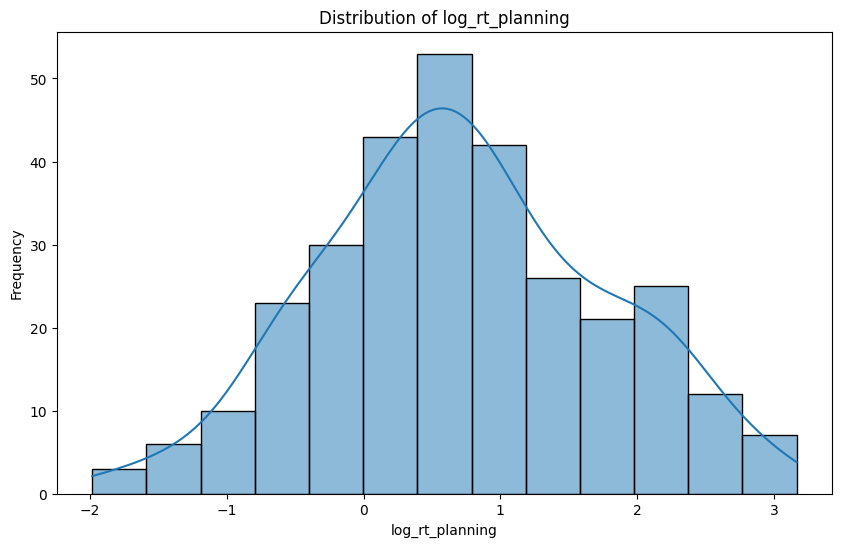

here
Pearson correlation between PR Evidence and log_rt_planning: -0.05020664717080263
Pearson correlation between PR and Bias BR: 0.18434425243856173


NameError: name 'ellele' is not defined

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import bambi as bmb

# Load data
df = pd.read_csv('rt_analysis.csv')
# 1. Convert rt_planning to log_rt_planning
df['log_rt_planning'] = np.log(df['rt_planning_pr']/df['median_RT_actionselection'])
df = df[df['log_rt_planning']>-2]
df = df[df['log_rt_planning']<5]

# 2. Plot log reaction times using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['log_rt_planning'], kde=True)
plt.title('Distribution of log_rt_planning')
plt.xlabel('log_rt_planning')
plt.ylabel('Frequency')
plt.show()

print('here')
# 3. Calculate and print Pearson correlation
correlation, _ = stats.pearsonr(df['PR Evidence'], df['log_rt_planning'])

print(f'Pearson correlation between PR Evidence and log_rt_planning: {correlation}')
correlation, _ = stats.pearsonr(df['PR Evidence'], df['bias_highbaserate'])
print(f'Pearson correlation between PR and Bias BR: {correlation}')

df['PR']=df['PR Evidence']-df['PR Evidence'].mean()/df['PR Evidence'].std()
df['MB']=df['post_map_change']-df['post_map_change'].mean()/df['post_map_change'].std()
df['BR']=df['bias_highbaserate']-df['bias_highbaserate'].mean()/df['bias_highbaserate'].std()
df.to_csv('rt_div.csv')

ellele
# 4. Hierarchical regression using Bambi
model2 = bmb.Model("log_rt_planning ~ PR_individual_answers+MB+BR+trial_num+(PR_individual_answers+trial_num|sub))", df)
fitted2 = model2.fit(draws=2000,target_accept=0.99)


In [2]:
import arviz as az
summary_df = az.summary(fitted2,var_names=['PR_individual_answers','BR'], hdi_prob=0.95)  # Exclude random effects conditioned on sub_id, consider 95% HDI
# Print the summary DataFrame
print(summary_df)

                        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
PR_individual_answers -0.305  0.111    -0.518     -0.085      0.001    0.001   
BR                     0.416  0.525    -0.570      1.462      0.009    0.006   

                       ess_bulk  ess_tail  r_hat  
PR_individual_answers    8506.0    6553.0    1.0  
BR                       3727.0    4603.0    1.0  
